# Taller Estadística para Data Science

Docente: Melanie Oyarzún

E-Mail: moyarzunw@udd.cl

Fecha: 12 agosto 2023

---

## Generalidades


### Descripción
El taller se divide en dos bloques, cada uno tiene un notebook que lo acompaña.

- El primer bloque revisaremos conceptos claves de la estadística y su aplicación concreta en análisis exploratorio de datos. [ Link Notebook bloque 1](https://github.com/melanieoyarzun/taller_estadisticaDS/blob/main/actividad_tallerSTATSIDS.ipynb)

- En el segundo bloque revisaremos conceptos asociados a la inferencia estadística y su aplicación en pruebas de hipotesis y experimentos aleatorios.
[ Link Notebook bloque 2](https://github.com/melanieoyarzun/taller_estadisticaDS/blob/main/bloque2-tallerSTATSIDS_inferencia.ipynb)

### Evaluación

Durante ambos bloques trabajaremos en una actividad de ejercitación que será evaluada, este puede ser de manera individual o en grupo de hasta 3 personas.  El enunciado estaá disponible en [link actividad](https://github.com/melanieoyarzun/taller_estadisticaDS/blob/main/actividad_tallerSTATSIDS.ipynb)

- La entrega es hasta el día lunes 28 AGO en el correo: moyarzunw@udd.cl,
- Enviar por correo con el asunto: Tarea taller serie de tiempo IDS, nombre apellido
- El notebook debe tener el nombre: Notebook- taller-aplicacion-nombre-apellido.ipnyb,
- Tambien puede enviarme un link en github si está publico o me concede acceso.

---

# Bloque 2: Inferencia estadística y experimentos alteatorios

En este bloque nos enfocaremos en el tema de inferencia estadística y una de sus aplicaciones prácticas más utilizadas, los experimentos aleatorios.

## Inferencia estadística

Inferencia se refiere al proceso de hacer generalizaciones de una población a partir de una muestra representativa de esa población. En particular, la idea es que si tenemos un conjunto de datos (muestra) obtenido de una población más grande, podemos utilizar métodos estadísticos para sacar conclusiones sobre las características y propiedades de esa población en su totalidad.

El proceso de inferencia estadística se basa en el principio de que una muestra bien seleccionada puede proporcionar información valiosa sobre la población en general. Mediante el análisis de la muestra, podemos estimar parámetros poblacionales, como la media, la proporción o la desviación estándar, y también podemos construir intervalos de confianza para estimar el rango dentro del cual se espera que se encuentren estos parámetros.

El uso de la inferencia estadística es fundamental cuando es impracticable o costoso analizar cada elemento de una población en particular. Por ejemplo, en lugar de encuestar a todos los ciudadanos de un país, es mucho más factible encuestar una muestra representativa y utilizar esa información para hacer suposiciones sobre la opinión de la población en general.


## Ejemplo de aplicación: Peso de los Pingüinos Palmer

Consideremos los datos de los *pingüinos Palmer*. Los datos "Palmer Penguins" son un conjunto que detalla medidas morfológicas y características de tres especies de pingüinos: Adelie, Gentoo y Chinstrap. Recopilados por el Dr. Bill Link y su equipo. (Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. doi:10.5281/zenodo.3960218, R package version 0.1.0, https://allisonhorst.github.io/palmerpenguins/index.html) 

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

In [1]:
import seaborn as sns
import pandas as pd

# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


En el contexto de los pingüinos y el peso de su población, podríamos tomar una muestra de pingüinos y calcular un intervalo de confianza para el peso promedio. Esto nos daría una estimación del peso promedio de la población total, junto con la confianza en que este valor estimado es preciso.

Es importante tener en cuenta que el proceso de inferencia estadística se basa en suposiciones y en el uso adecuado de técnicas estadísticas. La elección de la muestra, la interpretación de los resultados y el nivel de confianza seleccionado son aspectos cruciales para realizar inferencias precisas y significativas.


Relicemos algunos ejemplos de pruebas de hipótesis, sobre el peso de los pingüinos.

Primero calcularemos el promedio muestral y lo veremos en el contexto de los datos observados:

In [2]:

# Calcular el promedio del peso de los pingüinos
promedio_peso = penguins['body_mass_g'].mean()

# Crear un histograma de la distribución del peso con el promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='body_mass_g', bins=20, kde=True)
plt.axvline(x=promedio_peso, color='red', linestyle='dashed', label='Promedio')
plt.title('Distribución de Peso de Pingüinos')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Nuestra idea de la inferencia, es aprovechar las propiedades del promedio muestral. De que es el promedio muestral el que se distribuye normal, su media es la media poblacional y conocemos sus características.

Por ejemplo, consideremos que de esta población de pingüinos obtenemos 1000 muestras de 40 individuos cada una. Si graficamos sus medias, podremos ver que estas se distribuyen aproximadamente normal. 
- Si reducimos el tamaño de muestra, más nos alejamos de la distribución normal.
- Si reducimos el número de repeticiones tambieé.

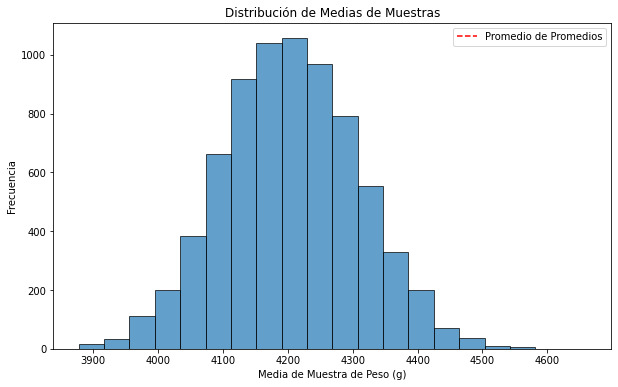

In [ ]:
import numpy as np

# Definir el tamaño de cada muestra y la cantidad de muestras
tamano_muestra = 50
cantidad_muestras = 10000

# Crear una lista para almacenar las medias de cada muestra
medias_muestras = []

# Realizar el muestreo y cálculo de medias para cada muestra
for _ in range(cantidad_muestras):
    muestra = np.random.choice(penguins['body_mass_g'], size=tamano_muestra, replace=False)
    media_muestra = np.mean(muestra)
    medias_muestras.append(media_muestra)

# Calcular el promedio de los promedios de las muestras
promedio_promedios = np.mean(medias_muestras)

# Crear el gráfico de las medias de las muestras
plt.figure(figsize=(10, 6))
plt.hist(medias_muestras, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=promedio_promedios, color='red', linestyle='dashed', label='Promedio de Promedios')
plt.title('Distribución de Medias de Muestras')
plt.xlabel('Media de Muestra de Peso (g)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



### Intervalo de confianza

Con la información podriamos construir un intervalo de confianza para el peso promedio de los pingüinos utilizando la distribución normal estándar (Z) y el nivel de confianza especificado (por ejemplo, 95%). 

El resultado será un rango de valores dentro del cual es probable que se encuentre el verdadero peso promedio de los pingüinos en la población, con un nivel de confianza del 95%.

In [ ]:
import seaborn as sns
import scipy.stats as stats

# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

# Calcular el tamaño de la muestra
n = len(penguins)

# Calcular la media y la desviación estándar del peso
mean_weight = penguins['body_mass_g'].mean()
std_dev = penguins['body_mass_g'].std()

# Nivel de confianza deseado (por ejemplo, 95%)
confidence_level = 0.95

# Calcular el error estándar (desviación estándar de la media)
std_error = std_dev / (n**0.5)

# Calcular el valor crítico de Z para el nivel de confianza
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calcular los límites del intervalo de confianza
confidence_interval_lower = mean_weight - z_critical * std_error
confidence_interval_upper = mean_weight + z_critical * std_error

# Mostrar el intervalo de confianza
print("Intervalo de Confianza:", (confidence_interval_lower, confidence_interval_upper))


Intervalo de Confianza: (4117.008501282991, 4286.500270646833)


## Comparaciones de grupos

Si hacemos una grafica de distribución de tamaño por especie y sexo, podriamos empezar a analizar diferencias entre los grupos.

In [ ]:
# Crear la tabla de doble entrada por tipo y sexo de los pinguinos
tabla_doble_entrada = penguins.groupby(['species', 'sex'])['body_mass_g'].agg(['mean', 'var']).reset_index()

# Renombrar las columnas para mayor claridad
tabla_doble_entrada.rename(columns={'mean': 'Promedio', 'var': 'Varianza'}, inplace=True)

# Mostrar la tabla de doble entrada
print(tabla_doble_entrada)

     species     sex     Promedio       Varianza
0     Adelie  Female  3368.835616   72565.639269
1     Adelie    Male  4043.493151  120278.253425
2  Chinstrap  Female  3527.205882   81415.441176
3  Chinstrap    Male  3938.970588  131143.605169
4     Gentoo  Female  4679.741379   79286.335451
5     Gentoo    Male  5484.836066   98068.306011


Podriamos querer saber si el peso es diferente para los pinguinos de la especie Adelie, para diferentes sexos:


**Pregunta de Prueba de Hipótesis:**

¿Existe una diferencia significativa en el peso promedio entre los pingüinos machos y las pingüinas hembras en la especie "Adelie"?

Hipótesis Nula (H0):

No hay diferencia significativa en el peso promedio entre los pingüinos machos y las pingüinas hembras en la especie "Adelie".

Hipótesis Alternativa (H1):

Existe una diferencia significativa en el peso promedio entre los pingüinos machos y las pingüinas hembras en la especie "Adelie".


Para probar esta hipótesis, podrías utilizar una prueba de hipótesis para comparar las medias de las muestras de peso de los pingüinos machos y hembras en la especie "Adelie". Esto te permitiría determinar si la diferencia observada en el peso promedio es lo suficientemente grande como para considerarse estadísticamente significativa.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


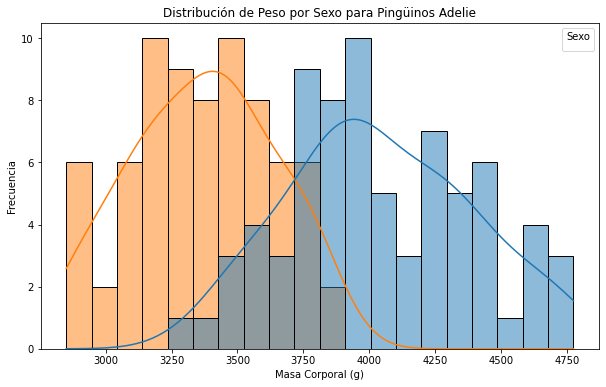

In [ ]:
import matplotlib.pyplot as plt

# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

# Filtrar los pingüinos de la especie "Adelie"
adelie_penguins = penguins[penguins['species'] == 'Adelie']

# Crear un histograma para la distribución de peso por sexo
plt.figure(figsize=(10, 6))
sns.histplot(data=adelie_penguins, x='body_mass_g', hue='sex', bins=20, kde=True)
plt.title('Distribución de Peso por Sexo para Pingüinos Adelie')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo')
plt.show()

A simple vista podriamos pensar ambos grupos son diferentes. Es más claro si dibujamos el promedio muestral observado.

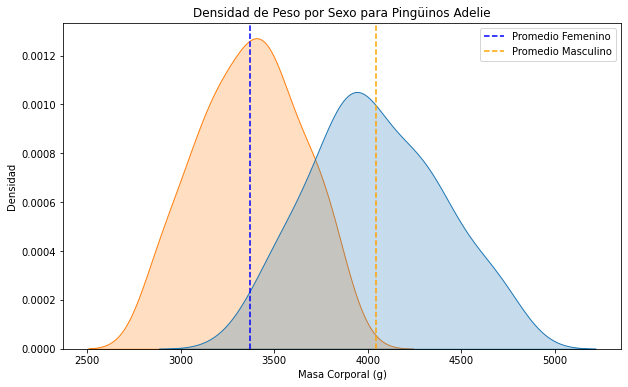

In [ ]:
# Crear un gráfico de densidad con líneas de promedio
plt.figure(figsize=(10, 6))
sns.kdeplot(data=adelie_penguins, x='body_mass_g', hue='sex', fill=True, common_norm=False)
plt.axvline(x=adelie_penguins.groupby('sex')['body_mass_g'].mean()['Female'], color='blue', linestyle='dashed', label='Promedio Femenino')
plt.axvline(x=adelie_penguins.groupby('sex')['body_mass_g'].mean()['Male'], color='orange', linestyle='dashed', label='Promedio Masculino')
plt.title('Densidad de Peso por Sexo para Pingüinos Adelie')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Si construimos una prueba t de diferencia de medias:

Estadística t: 13.126285923485874
Valor p: 6.402319748031793e-26


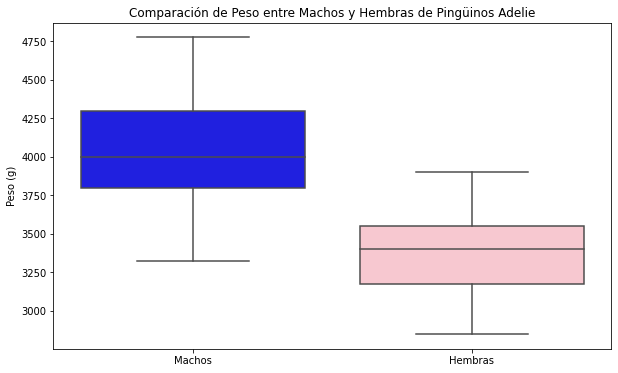

In [ ]:
# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

# Filtrar los pingüinos de la especie "Adelie"
adelie_penguins = penguins[penguins['species'] == 'Adelie']

# Filtrar machos y hembras
machos = adelie_penguins[adelie_penguins['sex'] == 'Male']
hembras = adelie_penguins[adelie_penguins['sex'] == 'Female']

# Realizar la prueba t independiente
t_statistic, p_value = stats.ttest_ind(machos['body_mass_g'], hembras['body_mass_g'], equal_var=False)

# Imprimir resultados
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

# Crear un gráfico de comparación de peso
plt.figure(figsize=(10, 6))
sns.boxplot(data=[machos['body_mass_g'], hembras['body_mass_g']], palette=['blue', 'pink'])
plt.title('Comparación de Peso entre Machos y Hembras de Pingüinos Adelie')
plt.xticks([0, 1], ['Machos', 'Hembras'])
plt.ylabel('Peso (g)')
plt.show()

Finalmente, podriamos querer comparar hembras y machos de diferentes Islas. Para esto podriamos usar una prueba ANOVA.

En este código, primero cargamos el conjunto de datos "Penguins" y luego creamos dos subconjuntos separados para machos y hembras. Después, utilizamos la función stats.f_oneway() para realizar una prueba ANOVA para comparar los pesos entre hembras y machos. El resultado incluye la estadística F y el valor p.

El valor p nos indica si hay una diferencia significativa entre los grupos. Si el valor p es menor que un umbral de significancia (por ejemplo, 0.05), podríamos rechazar la hipótesis nula y concluir que hay una diferencia significativa en el peso entre hembras y machos de diferentes islas.

Recuerda que, antes de realizar una prueba ANOVA, es importante verificar las suposiciones necesarias, como la normalidad y la homogeneidad de varianzas en los grupos. Si estas suposiciones no se cumplen, podría ser necesario considerar otras pruebas estadísticas o transformaciones de los datos.

In [ ]:
import seaborn as sns
import scipy.stats as stats

# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

# Filtrar machos y hembras
machos = penguins[penguins['sex'] == 'Male']
hembras = penguins[penguins['sex'] == 'Female']

# Realizar una prueba ANOVA
result = stats.f_oneway(machos['body_mass_g'], hembras['body_mass_g'])

# Imprimir resultados
print("Estadística F:", result.statistic)
print("Valor p:", result.pvalue)


Estadística F: 72.96098633250911
Valor p: 4.897246751596325e-16


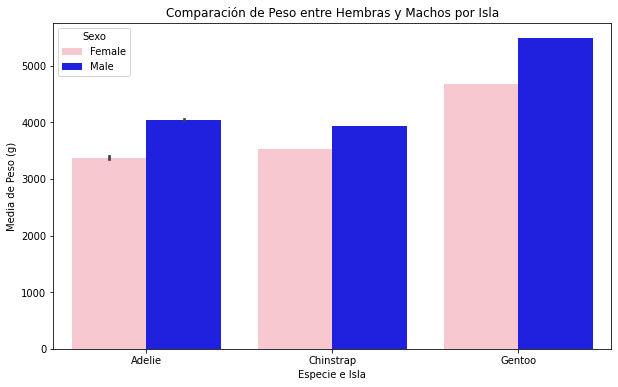

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Cargar el conjunto de datos "Penguins"
penguins = sns.load_dataset("penguins")

# Filtrar machos y hembras
machos = penguins[penguins['sex'] == 'Male']
hembras = penguins[penguins['sex'] == 'Female']

# Realizar una prueba ANOVA
result = stats.f_oneway(machos['body_mass_g'], hembras['body_mass_g'])

# Calcular las medias de peso por género e isla
medias_peso = penguins.groupby(['species', 'island', 'sex'])['body_mass_g'].mean().reset_index()

# Crear un gráfico de barras con puntos y intervalos de confianza
plt.figure(figsize=(10, 6))
sns.barplot(data=medias_peso, x='species', y='body_mass_g', hue='sex', errorbar='sd', palette=['pink', 'blue'])
#sns.boxplot(data=medias_peso, x='species', y='body_mass_g', hue='sex', palette=['blue', 'pink'])
plt.title('Comparación de Peso entre Hembras y Machos por Isla')
plt.xlabel('Especie e Isla')
plt.ylabel('Media de Peso (g)')
plt.legend(title='Sexo')
plt.show()


# Experimentos Aleatorios y pruebas A/B

Un experimento estadístico es un enfoque científico que busca establecer relaciones de causalidad y obtener conclusiones sobre cómo ciertas variables afectan a otras. Los experimentos estadísticos se diseñan para manipular deliberadamente una o más variables independientes y observar los efectos que tienen sobre una variable dependiente. Al controlar y manipular las variables de interés, los experimentos permiten a los investigadores hacer afirmaciones más sólidas sobre las relaciones causales.

Una prueba A/B, también conocida como prueba de división, es una técnica utilizada en la investigación y el análisis para comparar dos variantes o grupos con el fin de determinar cuál de ellos produce un mejor resultado en términos de rendimiento, efectividad o preferencia. En una prueba A/B, se selecciona un grupo de muestra y se divide en dos grupos, uno que experimenta la variante "A" (por ejemplo, una versión actual) y otro que experimenta la variante "B" (por ejemplo, una versión modificada). Luego, se recopilan datos y se comparan los resultados de ambos grupos para determinar cuál variante es más efectiva. Las pruebas A/B son comunes en marketing, diseño de productos y desarrollo web para tomar decisiones informadas sobre mejoras y optimizaciones.

Las pruebas A/B es son ampliamente utilizado en diversas áreas, como el marketing, la investigación de usuarios y el diseño de productos. En una prueba A/B, se seleccionan dos grupos de muestra: uno experimenta la versión original (A) y el otro experimenta una variante modificada (B). La idea detrás de una prueba A/B es evaluar si la variante B produce un efecto significativamente diferente en una métrica de interés en comparación con la variante A.


Mediante la asignación aleatoria de los participantes a los grupos A y B, y al controlar las condiciones en las que se les presenta cada variante, se reduce la posibilidad de sesgos y se permite un análisis causal más confiable. Al comparar las diferencias observadas en los resultados entre los grupos A y B, es posible inferir si la variante B tiene un impacto significativo en la variable de interés.

Sin embargo, es importante tener en cuenta que aunque las pruebas A/B proporcionan evidencia de asociación causal, no garantizan que la causalidad sea absoluta. Otros factores no controlados pueden influir en los resultados. Para obtener una comprensión más completa de la causalidad, los experimentos controlados aleatorizados y el uso de métodos de diseño experimental sólidos son esenciales. Las pruebas A/B son una herramienta poderosa para explorar causas y efectos en condiciones controladas y analizar el rendimiento relativo de diferentes opciones.

Veamos un ejemplo en la práctica. Este es parte del ejercicio de aplicación.

## Caso:  **Aplicación de A/B testing para promoción de Marketing**

## Enunciado


Imaginemos que trabajamos en una empresa de e-commerce que vende productos electrónicos y queremos aumentar las ventas en una línea de productos específica, como teléfonos móviles. 

Para ello, decidimos utilizar una promoción de ventas basada en una ruleta lúdica que ofrecerá descuentos a los clientes que la utilicen.

Para implementar la promoción, primero seleccionamos aleatoriamente un grupo de clientes y les enviamos un correo electrónico con un enlace a la ruleta lúdica. Al hacer clic en el enlace, los clientes son redirigidos a una página en la que pueden girar la ruleta y ganar un descuento en su próxima compra.

Vamos a pensar que los clientes son asignados a uno de los siguientes grupos: 
- Control: no les da una promoción (mala suerte, intentalo otra vez)
- Tratamiento 1: 20% de descuento en el producto
- Tratamiento 2: Un complemento gratuito (carcasa) que tiene un costo para la empresa similar al descuento.


## Creación de los datos
Como nuestro caso es un ejemplo ficticio, vamos a crear los datos.

Este código creará un conjunto de datos con 400 observaciones (200 en el grupo de control y 200 en el grupo de tratamiento), donde se simulan lascompras de cada usuario.

In [ ]:
import numpy as np
import pandas as pd
import random

# Define una semilla para la generación de números aleatorios
np.random.seed(123)
random.seed(123)

# Crear un vector de 200 valores aleatorios para el grupo de control
control = np.random.choice(["Control"], size=200, replace=True)

# Crear un vector de 200 valores aleatorios para el grupo de tratamiento
tratamiento = np.random.choice(["Treatment 1", "Treatment 2"], size=100, replace=True, p=[0.7, 0.3])

# Crear un vector de número de compras para cada grupo
control_compras = np.random.binomial(5, 0.2, size=200)
tratamiento1_compras = np.random.binomial(5, 0.4, size=100)
tratamiento2_compras = np.random.binomial(5, 0.6, size=100)

# Combinar los vectores en un DataFrame
data = {
    'grupo': np.concatenate((control, np.repeat("Treatment", 200))),
    'tipo_tratamiento': np.concatenate((np.repeat("Control", 200), np.repeat(["Treatment 1", "Treatment 2"], [100, 100]))),
    'ventas': np.concatenate((control_compras, tratamiento1_compras, tratamiento2_compras))
}

ventas_df = pd.DataFrame(data)

# Verificar el DataFrame
print(ventas_df)


         grupo tipo_tratamiento  ventas
0      Control          Control       1
1      Control          Control       1
2      Control          Control       0
3      Control          Control       0
4      Control          Control       0
..         ...              ...     ...
395  Treatment      Treatment 2       1
396  Treatment      Treatment 2       2
397  Treatment      Treatment 2       1
398  Treatment      Treatment 2       3
399  Treatment      Treatment 2       2

[400 rows x 3 columns]


Estudiemos si la promoción fue efectiva en estos datos. Para esto:

1. Describa los resultados de la promocion para los diferentes grupos, en terminos de estadisticas descriptivas.
2. Compare visualmente los resultados de los diferentes grupos.
3. ¿Fue la promocion efectiva? Use una prueba de hipotesis para analizar el grupo tratado y de control.
4. ¿Cual de las promociones fue más efectiva? Use una prueba ANOVA.